# Matplotlib基本图形

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [22]:
df = pd.read_excel('折线图.xlsx')
df.head()

### 1900-01-01   => 1 (数值格式)

,日期,总销售额,FBA销售额,自配送销售额
0,42964,3211.87,1596.16,1615.71
1,42965,3376.35,1777.65,1598.70
2,42966,3651.55,2304.97,1239.75
3,42967,2833.74,1431.51,1402.23
4,42968,3232.76,1568.85,1663.91


- 当我们在Excel中存储日期格式的时候，把它变成数值格式的时候，自动从1900年1月1日开始算，变成数字1
- 与时间戳无关（1970年1月1日开始）
- 1900年2月实际上是有28天，但Excel当中的计算是有29天内，这是一个bug,需要减两天，一天是1900年1月1日，另外一天是1900年2月多出来的这一天

In [23]:
df["日期"] = pd.to_datetime(df['日期']-2,unit="d",origin=pd.Timestamp("1900-01-01"))

In [24]:
df.head()

,日期,总销售额,FBA销售额,自配送销售额
0,2017-08-17,3211.87,1596.16,1615.71
1,2017-08-18,3376.35,1777.65,1598.70
2,2017-08-19,3651.55,2304.97,1239.75
3,2017-08-20,2833.74,1431.51,1402.23
4,2017-08-21,3232.76,1568.85,1663.91


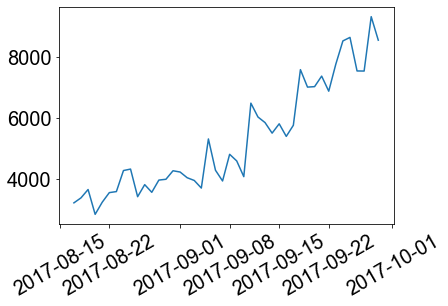

In [25]:
plt.xticks(rotation = 30)
plt.plot(df["日期"],df["总销售额"])
plt.show()


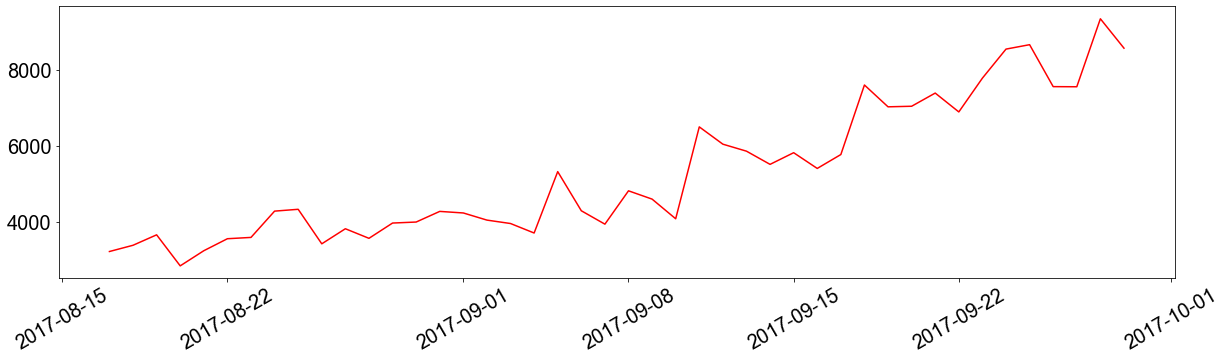

In [26]:
## 设置画布的大小
plt.figure(figsize = (20,5))
# 先得有画布
plt.xticks(rotation = 30)
plt.plot(df["日期"],df["总销售额"],color = "red")
plt.show()

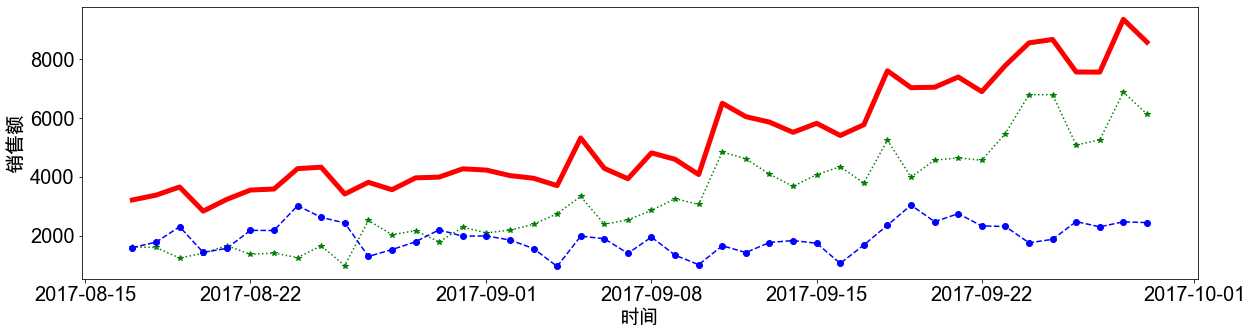

In [27]:
# 多个线条画在一个图
# 一个图上画一个图
font = {"family":"Arial Unicode MS","size":"20"}
plt.rc("font",**font)


plt.figure(figsize=(20,5))
plt.plot(df["日期"],df["总销售额"],color = "red",linewidth = 5)
plt.plot(df["日期"],df["自配送销售额"],color = "green",marker = "*",linestyle = ":")
plt.plot(df["日期"],df["FBA销售额"],color = "blue",marker = "o",linestyle = "--")


plt.xlabel("时间")
plt.ylabel("销售额")
plt.show()

## 柱状图

In [32]:
df = pd.read_excel("长尾分布.xlsx")
df.head()

,排序,销量
0,1,16000
1,2,15000
2,3,5500
3,4,5000
4,5,4951


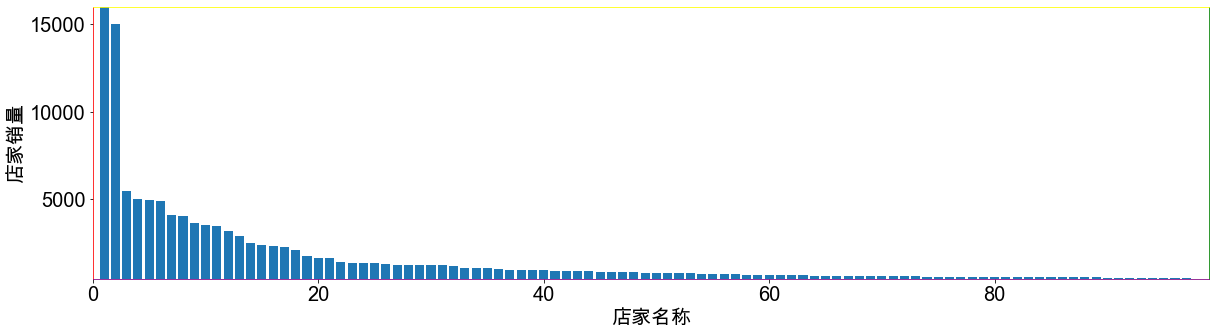

In [43]:
plt.figure(figsize=(20,5))
plt.bar(df["排序"],df["销量"])

# 设置边框的颜色
ax = plt.gca()
ax.spines['right'].set_color("green")
ax.spines['left'].set_color("red")
ax.spines['top'].set_color("yellow")
ax.spines['bottom'].set_color("purple")

# 调整x轴和y轴刻度开始的位置
plt.xlim(df.index.values[0],df.index.values[-1])

# 设置y轴的刻度
plt.ylim(np.min(df["销量"]),np.max(df["销量"]))

plt.xlabel('店家名称')
plt.ylabel('店家销量')
plt.show()

## 条形图

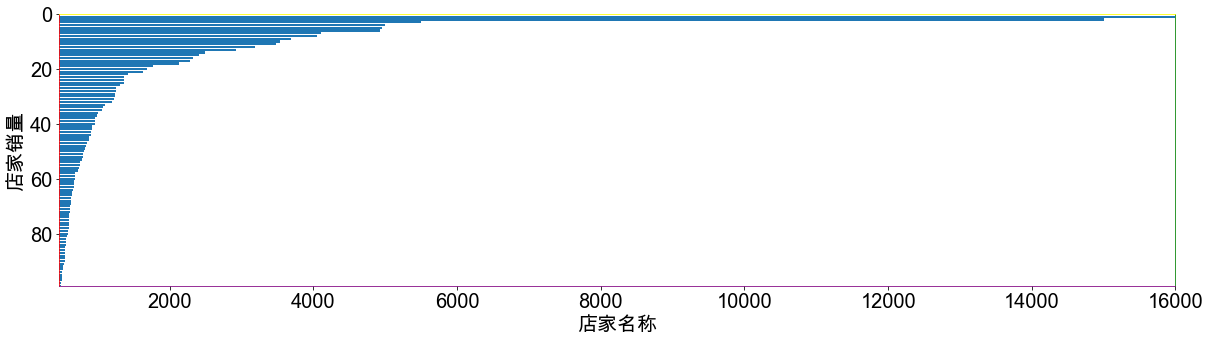

In [48]:
plt.figure(figsize=(20,5))
plt.barh(df["排序"],df["销量"])

# 设置边框的颜色
ax = plt.gca()
ax.spines['right'].set_color("green")
ax.spines['left'].set_color("red")
ax.spines['top'].set_color("yellow")
ax.spines['bottom'].set_color("purple")

# 调整x轴和y轴刻度开始的位置
plt.ylim(df.index.values[-1],df.index.values[0])

# 设置y轴的刻度
plt.xlim(np.min(df["销量"]),np.max(df["销量"]))

plt.xlabel('店家名称')
plt.ylabel('店家销量')
plt.show()

In [49]:
## 饼图是显示比例最方便的图形
data = pd.read_excel("折线图.xlsx")
data.head()

,日期,总销售额,FBA销售额,自配送销售额
0,42964,3211.87,1596.16,1615.71
1,42965,3376.35,1777.65,1598.70
2,42966,3651.55,2304.97,1239.75
3,42967,2833.74,1431.51,1402.23
4,42968,3232.76,1568.85,1663.91


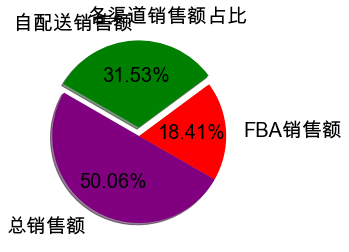

In [68]:
sum_sale = np.sum(data['总销售额'])
fba_sale = np.sum(data['FBA销售额'])
data_sale = np.sum(data['自配送销售额'])
data_list = [sum_sale,fba_sale,data_sale]
labels = ['总销售额','FBA销售额','自配送销售额']
plt.pie(data_list,
       labels = labels,
       colors = ["purple","red","green"],
       shadow = True,
       labeldistance = 1.2,
       autopct = "%1.2f%%",
        startangle = 150,
       explode = [0,0,0.1])

plt.title("各渠道销售额占比",loc = "right",fontdict = {"size":"20"})
plt.show()

# 散点图

In [71]:
# 散点图有时也可以演化成气泡图
df = pd.read_excel("气泡图.xlsx")
df.head()

,产品编号,广告ROI,平均单个订单成本,订单额
0,1,15.0,6,700
1,2,12.0,30,8400
2,3,1.0,7,350
3,4,5.0,10,500
4,5,6.5,25,4000


In [87]:
## 颜色是 RGB值构成的
import random
def random_colors(numbers):
    colors = []
    number = 0
    while number < numbers:
        color_array = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
        color = ""
        for i in range(6):
            color += color_array[random.randint(0,len(color_array)-1)]
        color = "#" + color
        colors.append(color)
        number +=1
    return colors

colors = random_colors(10)

        

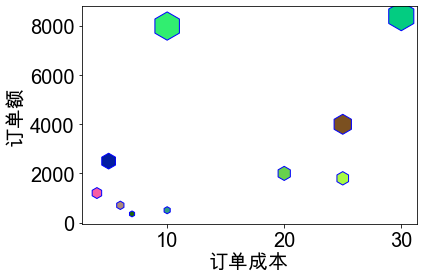

In [90]:
plt.scatter(df['平均单个订单成本'],df["订单额"],
           s = df['订单额']/10,
           marker = "h",
           c = colors,
           linewidth = 1,
           edgecolors = "b")
plt.xlabel('订单成本')
plt.ylabel('订单额')
plt.show()

In [93]:
## 颜色的渐变
df1 = df.sort_values("订单额")
df1

,产品编号,广告ROI,平均单个订单成本,订单额
2,3,1.0,7,350
3,4,5.0,10,500
0,1,15.0,6,700
9,10,7.5,4,1200
6,7,1.0,25,1800
7,8,3.0,20,2000
5,6,12.5,5,2500
4,5,6.5,25,4000
8,9,10.0,10,8000
1,2,12.0,30,8400


In [94]:
x = []
for i in df1.index.values:
    x.append(random.randint(10,1000))
df1['人力投入'] = x
df1

,产品编号,广告ROI,平均单个订单成本,订单额,人力投入
2,3,1.0,7,350,436
3,4,5.0,10,500,858
0,1,15.0,6,700,568
9,10,7.5,4,1200,446
6,7,1.0,25,1800,618
7,8,3.0,20,2000,259
5,6,12.5,5,2500,614
4,5,6.5,25,4000,405
8,9,10.0,10,8000,819
1,2,12.0,30,8400,257


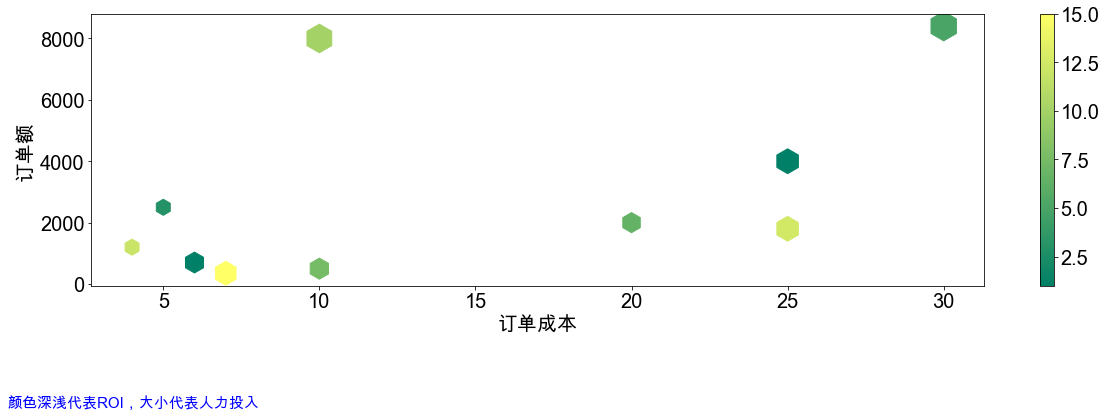

In [106]:
## 结合颜色，图形大小，x和y轴展示4维数据

plt.figure(figsize = (20,5))
# 根据大小设置渐变色
sc = plt.scatter(df['平均单个订单成本'],df["订单额"],
           s = df1['人力投入'],
           marker = "h",
           c = df1["广告ROI"],
                cmap ="summer")
plt.colorbar(sc)
plt.xlabel('订单成本')
plt.ylabel('订单额')

# 填写图的说明
plt.text(x=0,y=-4000,s = "颜色深浅代表ROI，大小代表人力投入",fontdict = {'size':"15","color":"b"})

plt.show()


## 直方图

In [109]:
df = pd.read_excel("直方图.xlsx")
df

,ship-state,数量,占据比例
0,CA,273,0.094268
1,FL,211,0.072859
2,TX,205,0.070787
3,NY,179,0.061809
4,IL,126,0.043508
...,...,...,...
89,LA.,1,0.000345
90,MASSACHUSETTS,1,0.000345
91,N.C.,1,0.000345
92,R.I.,1,0.000345


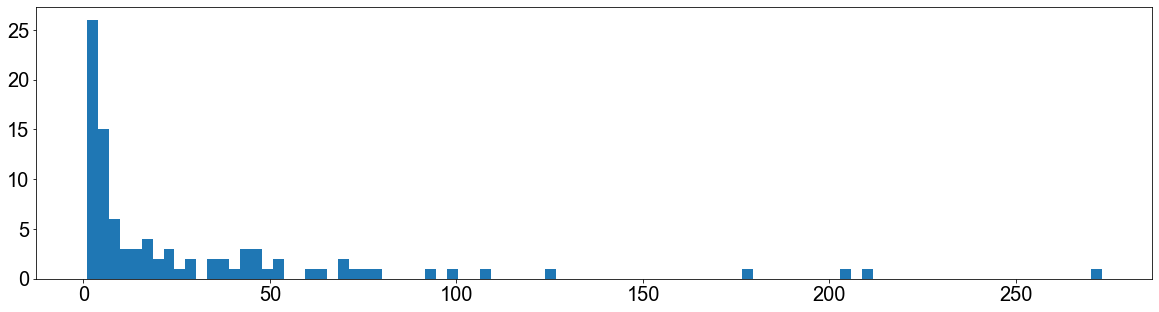

In [112]:
## 直方图的y轴表示数据的频数
plt.figure(figsize = (20,5))
plt.hist(df['数量'],
        bins = df.index.values[-1])
plt.show()

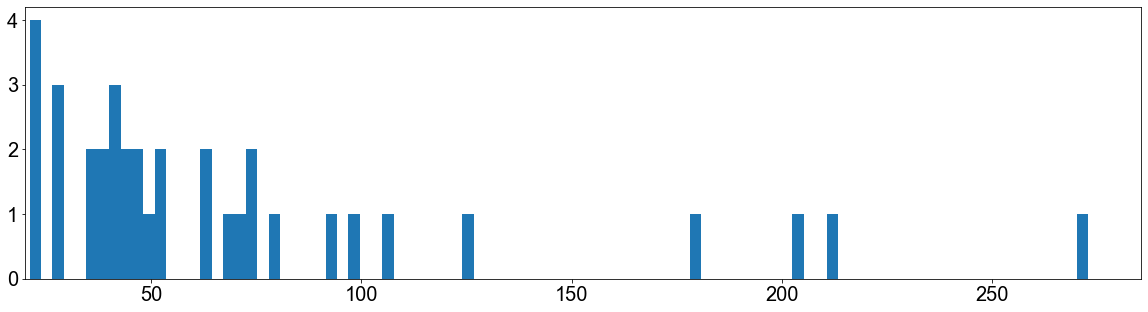

In [118]:
# 梳理一下数据，把数据过小的都去掉
df1 = df[df['数量']> 20]
plt.figure(figsize = (20,5))
plt.hist(df1['数量'],
        bins = df.index.values[-1],
        align='mid')
plt.xlim(20)
plt.show()
         

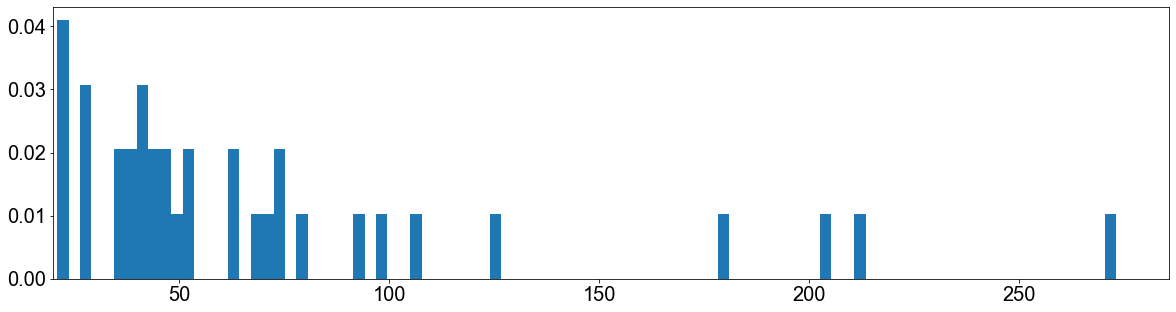

In [119]:
# 频率直方图
# 通过函数中的参数 density即可，density 的类型是一个bool值，指定为True则为频率直方图，反之，是频数直方图
df1 = df[df['数量']> 20]
plt.figure(figsize = (20,5))
plt.hist(df1['数量'],
        bins = df.index.values[-1],
        align='mid',
        density = True)
plt.xlim(20)
plt.show()

## 箱形图

In [121]:
df = pd.read_excel('长尾分布.xlsx')
df.head()

,排序,销量
0,1,16000
1,2,15000
2,3,5500
3,4,5000
4,5,4951


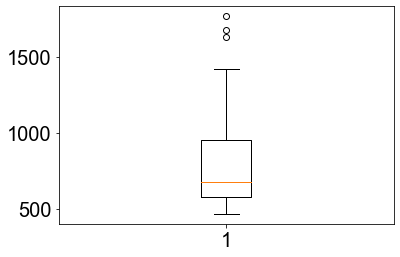

In [123]:
plt.boxplot(df[df['销量']<2000]['销量'])
plt.show()
# 横线上面的是异常值
# 横线是上限值
# 依次往下是上4分位数、中位数、下4分位数、下限
# 上4分位是指全部数据中有四分之一的数据比它大

## 上四分位数减去下四分位数代表着四分位间距
# 异常值就是大于（上四分位+1.5*四分位间距）或小于（下四分位-1.5*四分位间距）
# 上限值就是等于（上四分位 + 1.5*四分位间距）的值

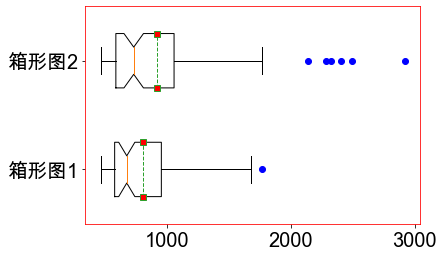

In [150]:
#多个参数 绘制多个箱形图
df1 = [df[df['销量']<2000]['销量'],df[df['销量']<3000]['销量']]
plt.boxplot(df1,
           notch = True,
           sym="b",
           vert=False,
           whis = 2,
            widths = 0.5,
           labels = ['箱形图1',"箱形图2"],
           showmeans = True,
           meanline = True,
           showfliers= True,
           meanprops = dict(markerfacecolor='r',marker = "s"),
           )
ax = plt.gca()
ax.spines['right'].set_color('red')
ax.spines['left'].set_color('red')
ax.spines['top'].set_color('red')
ax.spines['bottom'].set_color('red')

plt.show()

## 堆积条形图

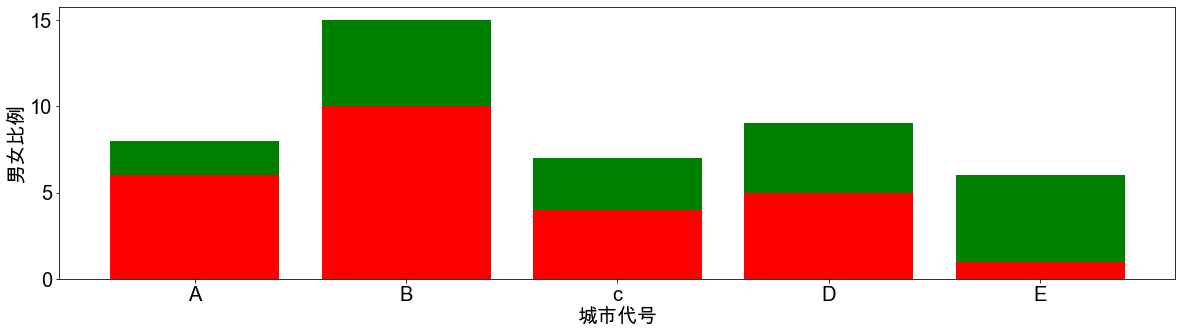

In [166]:
x = [1,2,3,4,5]
y = [6,10,4,5,1]
y1 = [2,5,3,4,5]

plt.figure(figsize = (20,5))
plt.bar(x,y,align = "center",color = "red",tick_label=['A','B','c','D','E'],label = '男人')
plt.bar(x,y1,align = "center",color = "green",bottom = y,label = "女人")
# 指定底部是谁
plt.xlabel("城市代号")
plt.ylabel("男女比例")
plt.show()